## Project Summary

A Demand System Approach to Asset Pricing by Ralph S.J. Koijen and Motohiro Yogo discuss the restrictions of the law of one price in asset pricing and it further evaluates the sensitivity of investors given the price changes with limited arbitrage in the stock market. In this project, we replicated Table D1 - A summary of 13F institutions by type - which provides financial statistics for banks, insurance companies, investment advisors, mutual funds and pension funds starting from 1980 until 2017.

Overall, it would be unfair to claim the replication process was entirely smooth; we faced some challenges. The initial challenge arose during the data retrieval. Even though eventually we pulled the 13F data and the mutual fund mapping from Wharton Research Data Services (WRDS) the size of the 13F data (~1.5GB) slowed our progress. Additionally, we encountered difficulty in obtaining the names of pension funds, resorting to manual extraction from a PDF file. A further challenge emerged from the absence of mutual fund mapping data from mid-2018 onwards, though this did not hinder the replication of Table D1; however, it proved troublesome for replicating Table D1 with more recent data (2018-2024). Apart from these impediments, close collaboration across team members and the instructions provided made this final project a great learning experience.


## Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import config
from pathlib import Path

DATA_DIR = Path(config.DATA_DIR)
OUTPUT_DIR = Path(config.OUTPUT_DIR)
STARTDATE = config.STARTDATE_OLD
ENDDATE = config.ENDDATE_OLD

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="plotnine")

In [12]:
import pdflatex

ModuleNotFoundError: No module named 'pdflatex'

In [10]:
from pull_wrds import load_13f, load_Mutual_Fund
import clean_data
import construct_stats
import df_constructor
import dfs_to_latex
import tex_to_pdf

ModuleNotFoundError: No module named 'pdflatex'

### Configure display settings

In [3]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Change default figure size
plt.rcParams['figure.figsize'] = 6, 5

## Load Data
Skip data pull due time constraint and directly load the pre-pulled data

In [4]:
df_raw_13f = load_13f()

## Clean Data

Use the starting and ending dates from the config.py in the clean_data function from clean_data.py

In [5]:
data_range = (STARTDATE, ENDDATE)
df_clean_13f = clean_data.clean_data(data_range)

## Create Descriptive Statistics
Use the cleaned data to generate some statistics from the table to be replicated

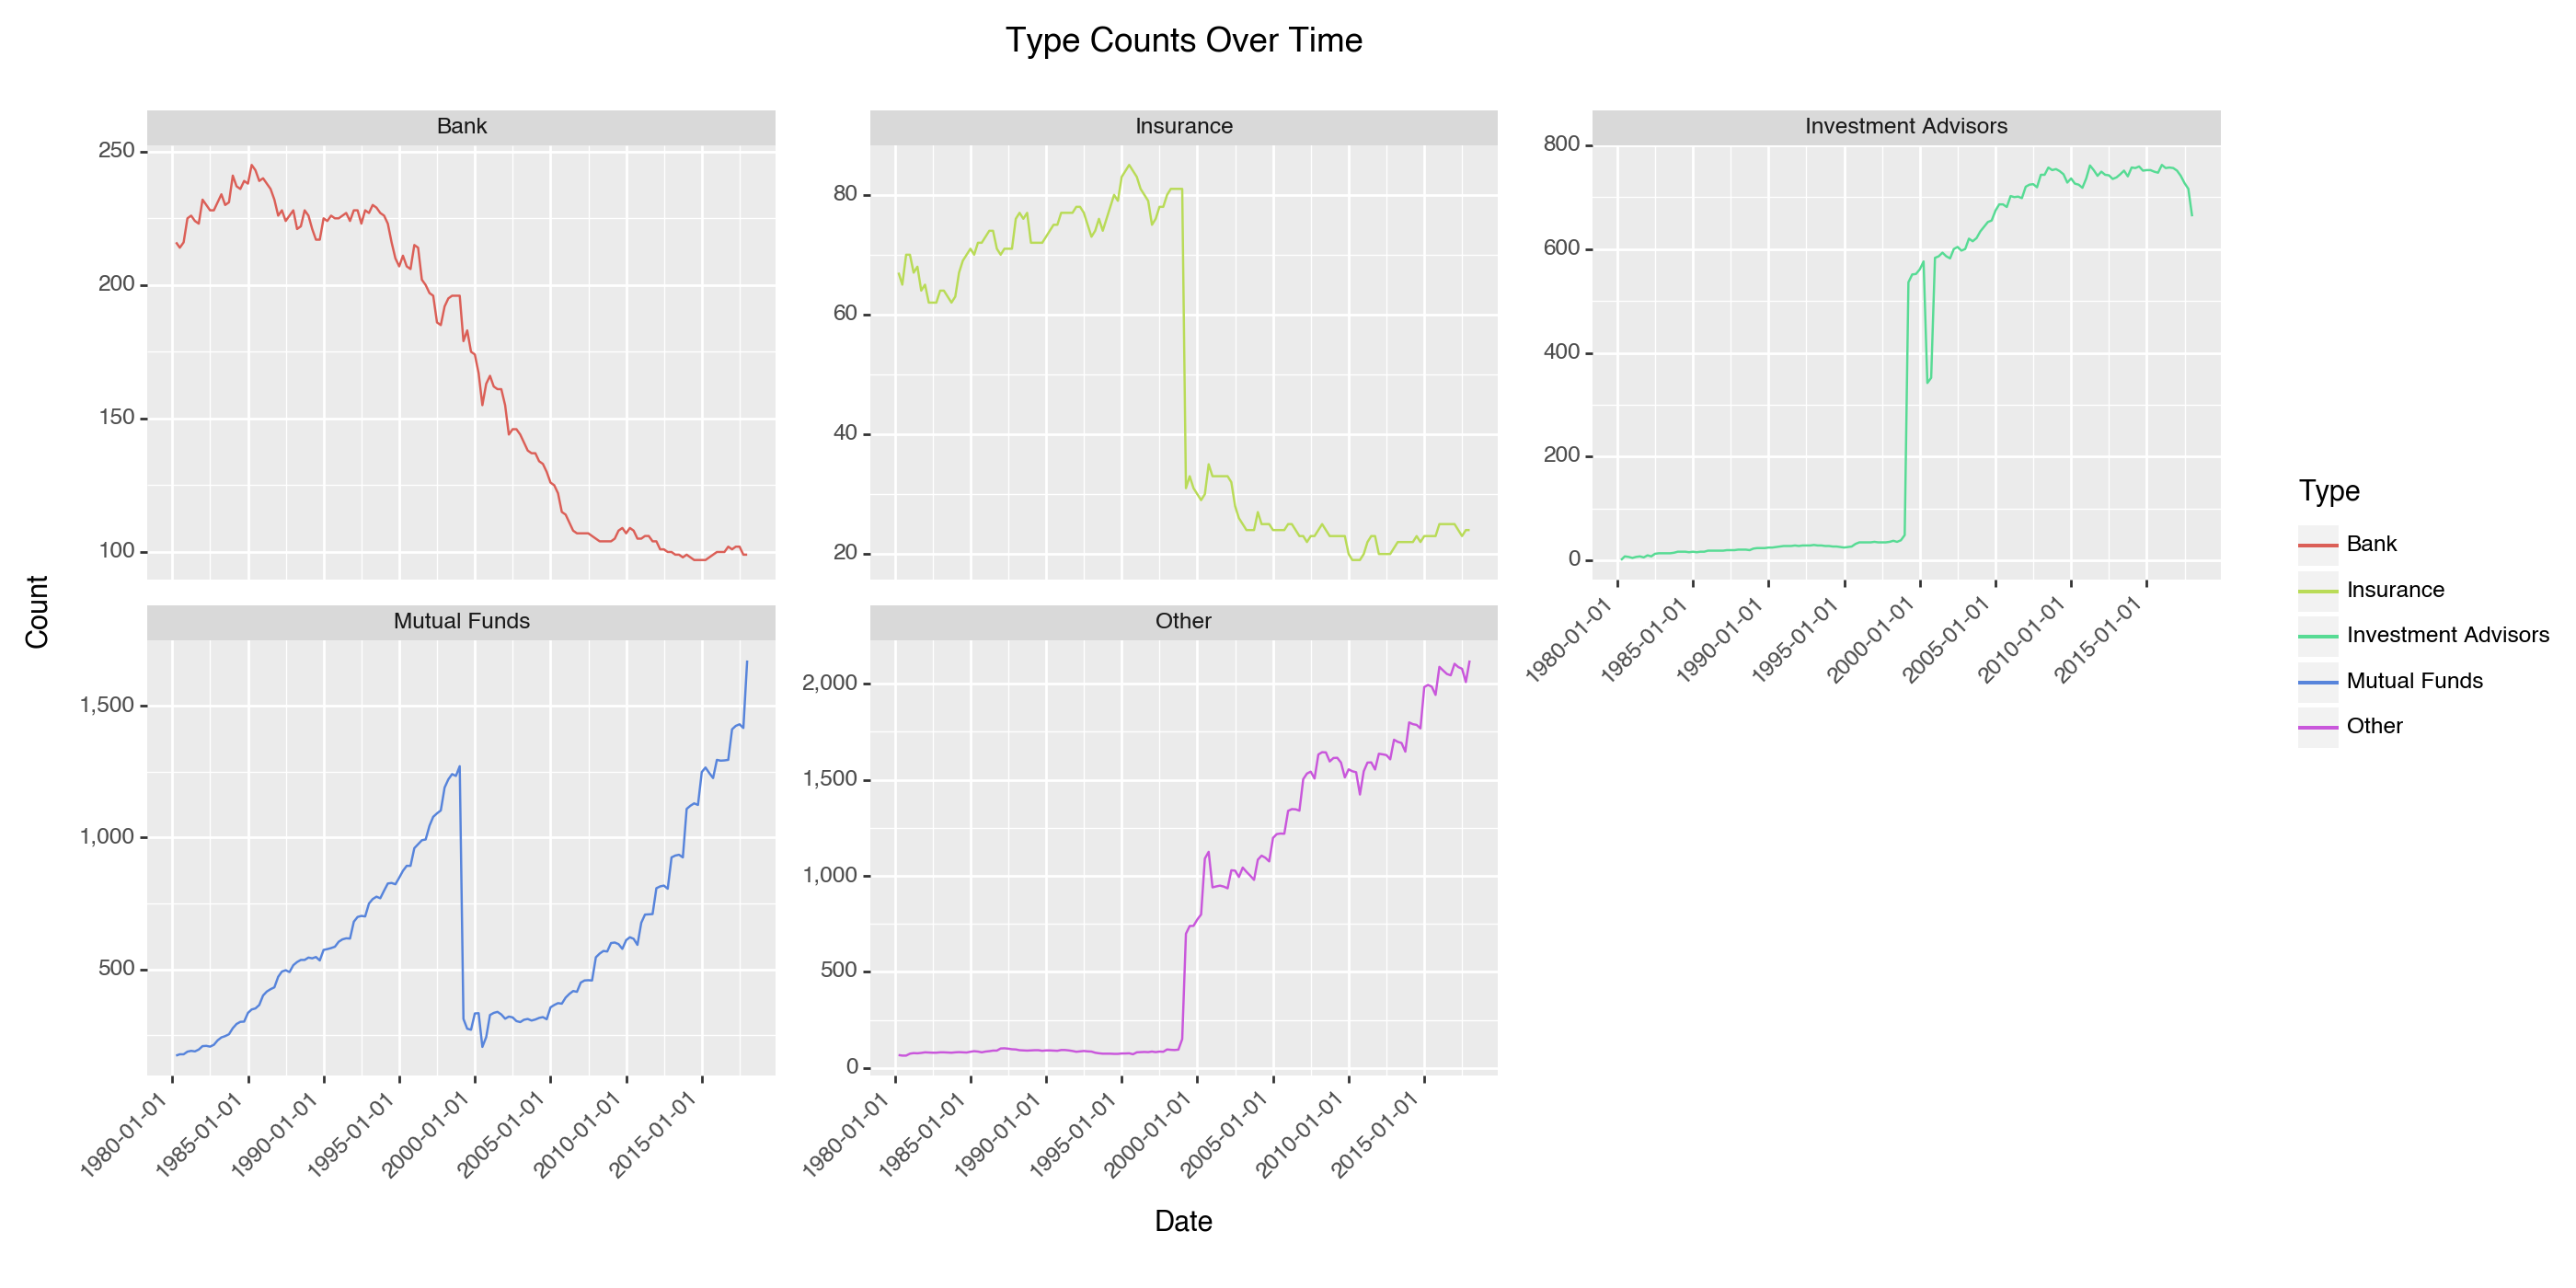

<Figure Size: (1400 x 700)>

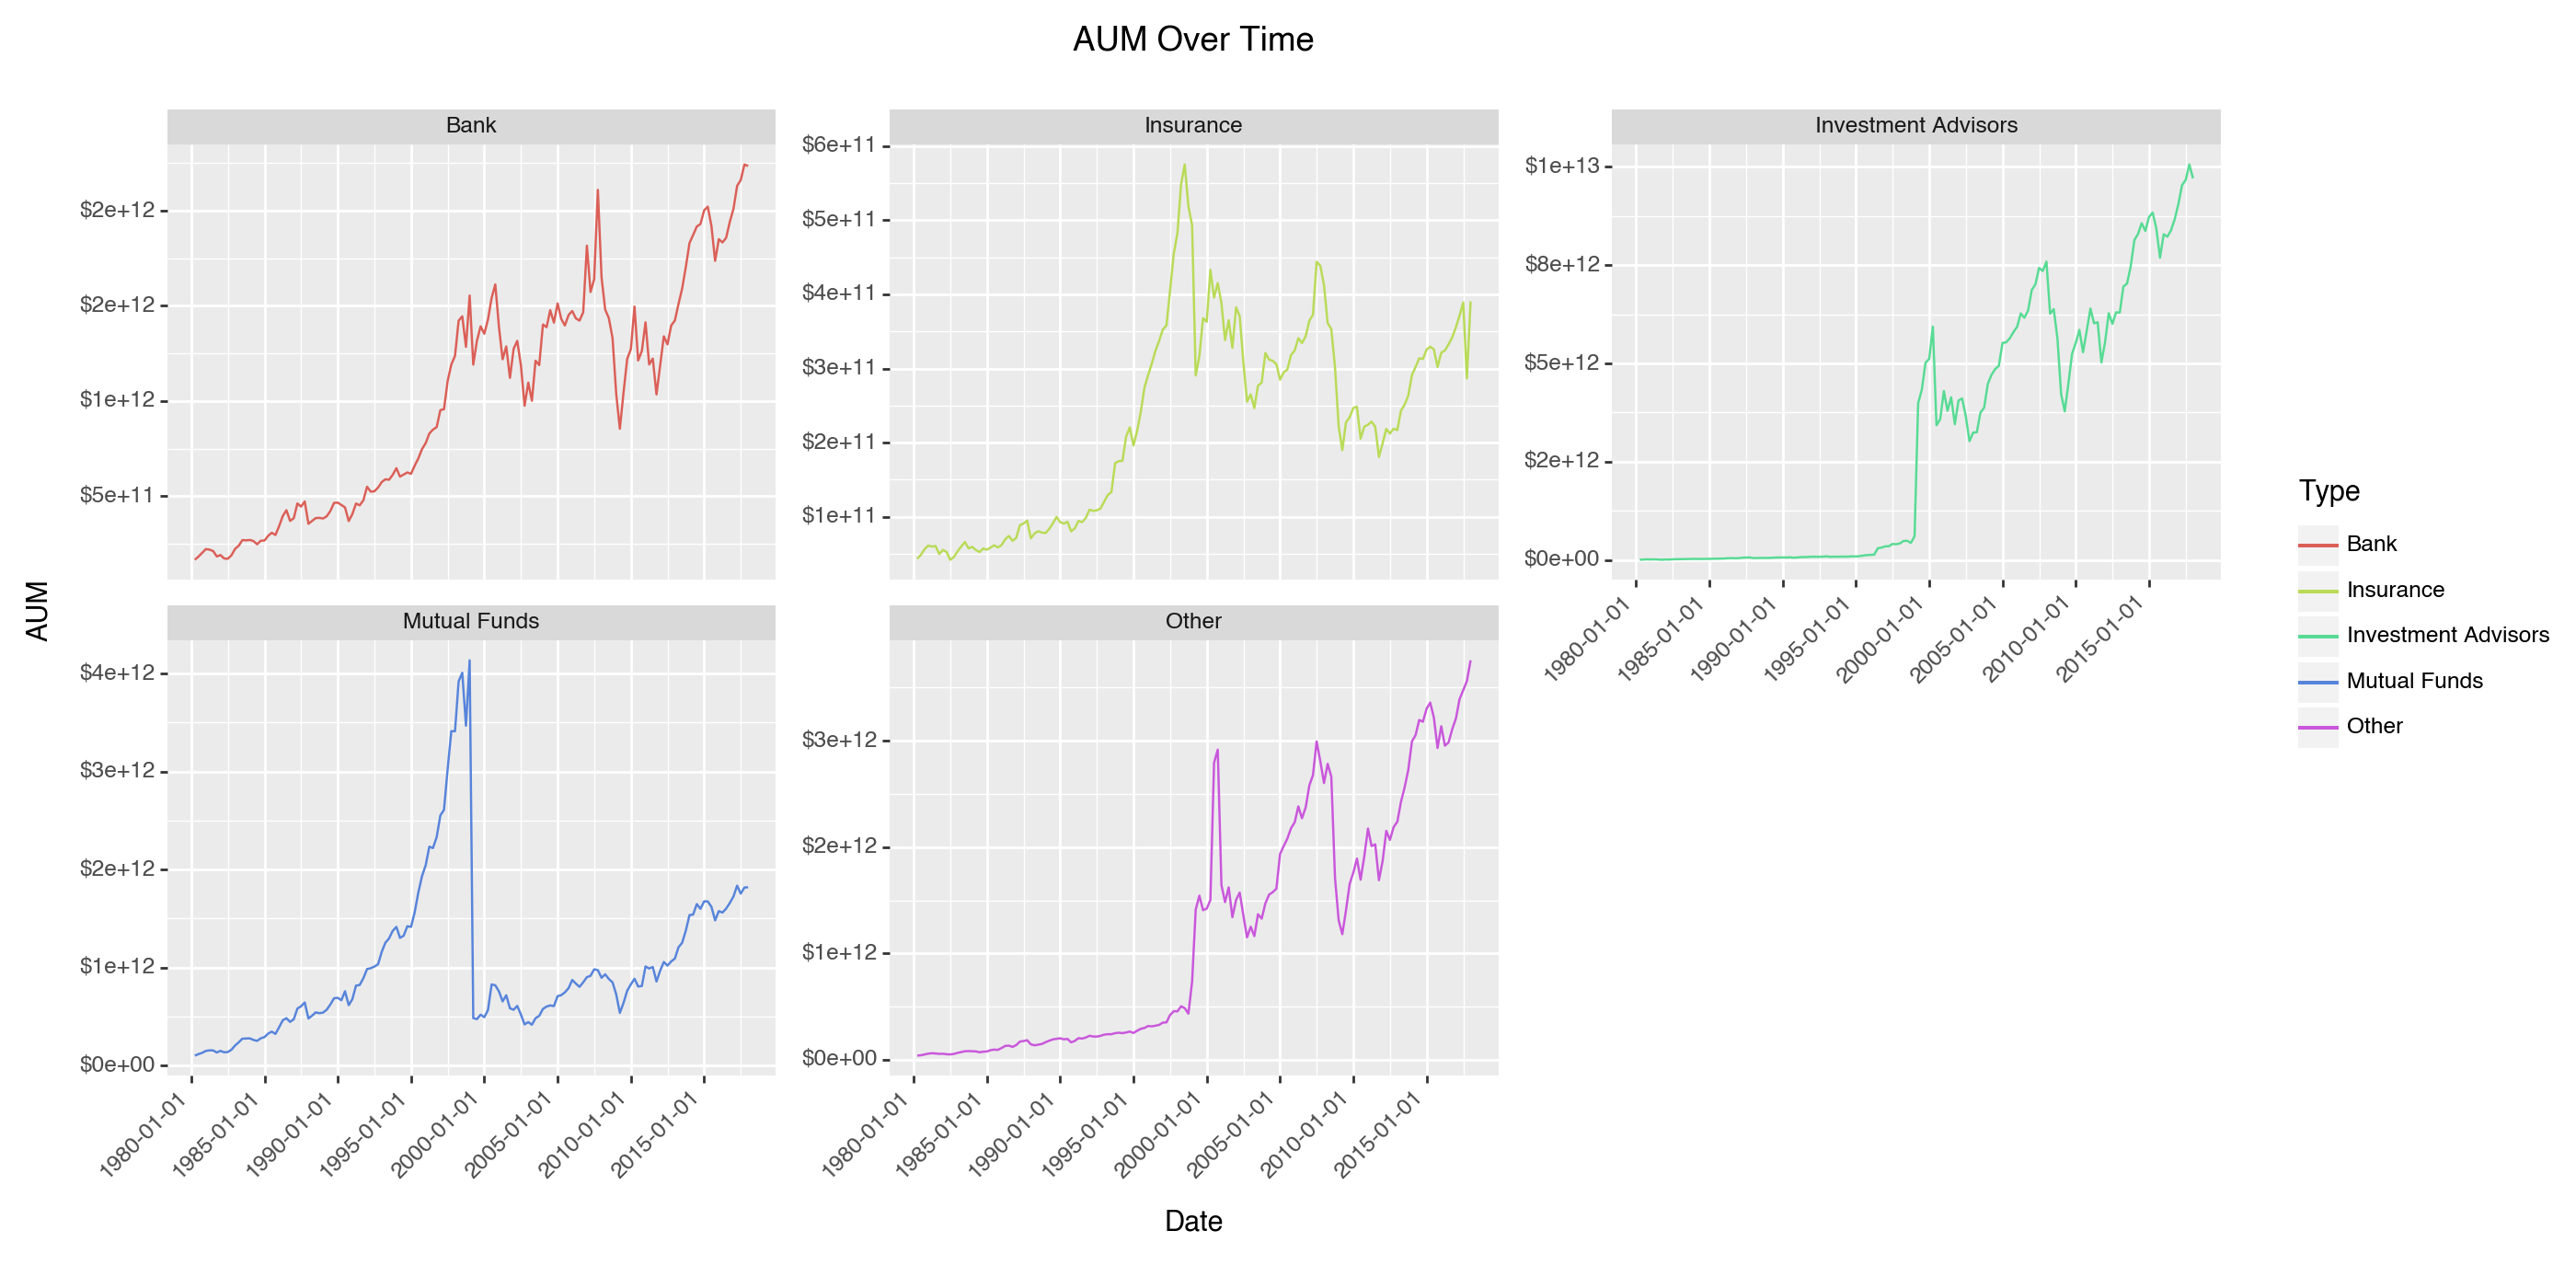

<Figure Size: (1400 x 700)>

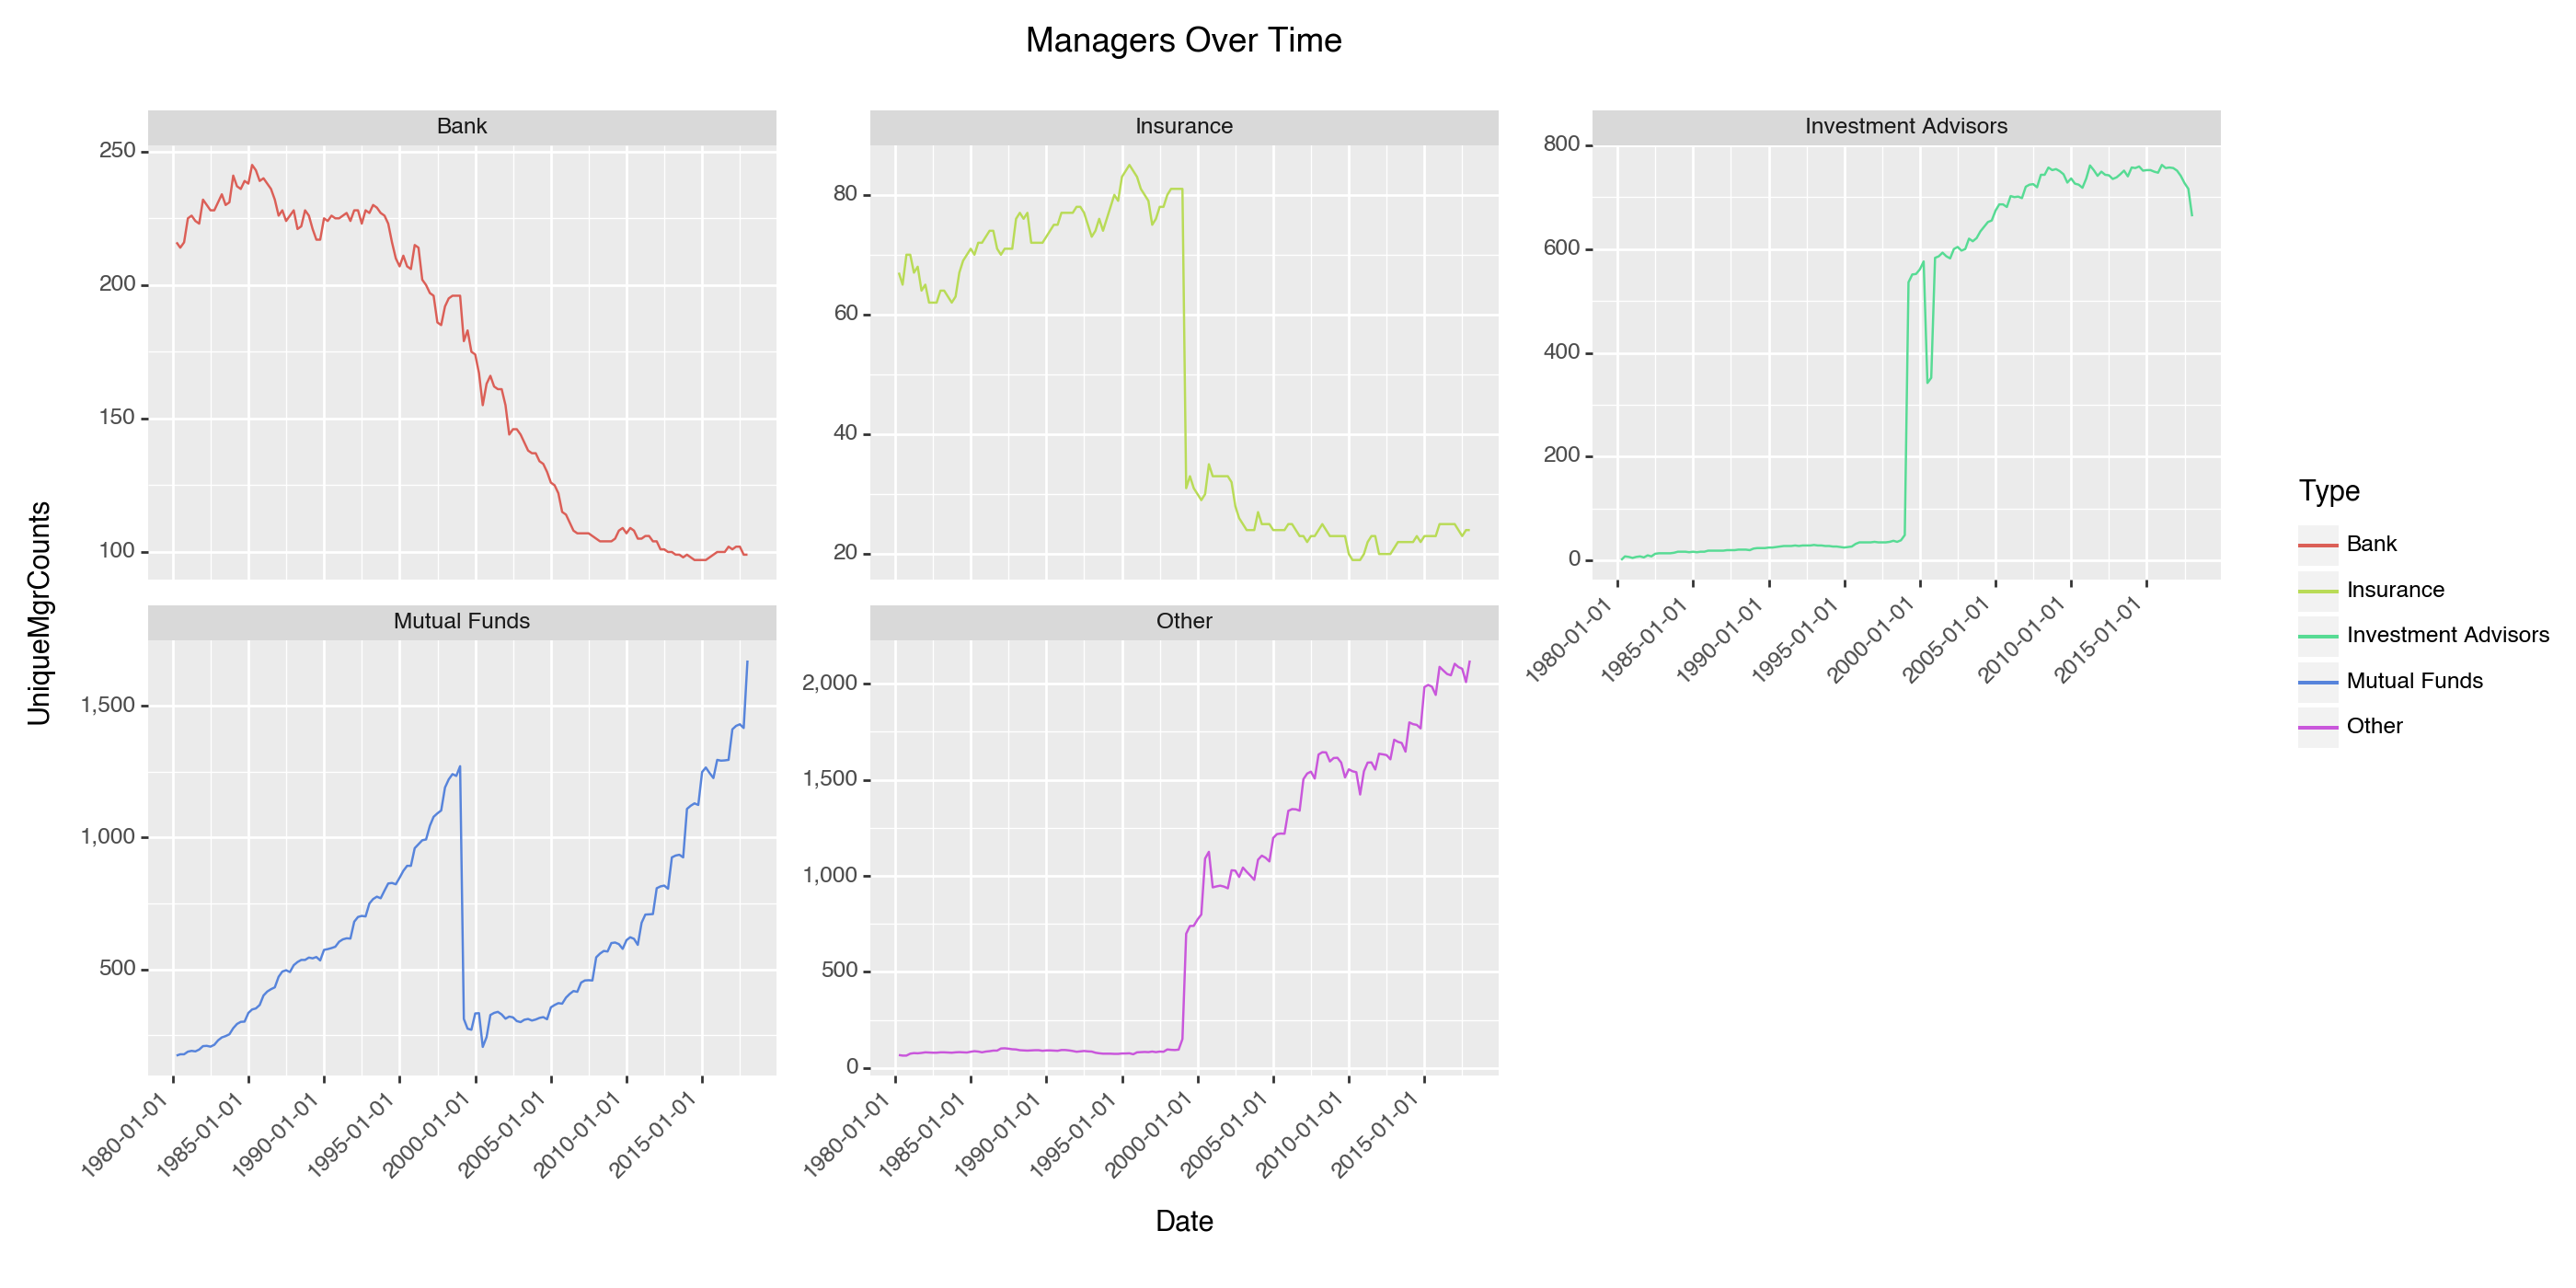

<Figure Size: (1400 x 700)>

In [6]:
type_counts_df, aum_df, mgrs_df = construct_stats.construct_stats(df_clean_13f)

construct_stats.plot_stats_data(type_counts_df, 'Count', 'Type Counts Over Time', 'type_counts.png')
construct_stats.plot_stats_data(aum_df, 'AUM', 'AUM Over Time', 'aum.png', True)
construct_stats.plot_stats_data(mgrs_df, 'UniqueMgrCounts', 'Managers Over Time', 'mgrs.png')

## Generate LaTeX output
Create the LaTeX output of the provided periods

In [7]:
periods   =   [('1980-01-01','1984-12-31'),
               ('1985-01-01','1989-12-31'),
               ('1990-01-01','1994-12-31'),
               ('1995-01-01','1999-12-31'),
               ('2000-01-01','2004-12-31'),
               ('2005-01-01','2009-12-31'),
               ('2010-01-01','2014-12-31'),
               ('2015-01-01','2017-12-31'),
               ('2018-01-01','2022-12-31'),
               ('2023-01-01','2023-12-31')]

dfs = df_constructor.build_DFs(df_raw_13f, periods)
#dfs_to_latex.df_to_latex(dfs, "full_report_demo.tex")

In [8]:
dfs_to_latex.df_to_latex(dfs, "full_report_demo.tex")

## Generate a PDF using the LaTeX output
Create a PDF of the LaTeX in the output directory 

In [9]:
tex_to_pdf.generate_pdf_from_tex("full_report_demo.tex")

NameError: name 'tex_to_pdf' is not defined